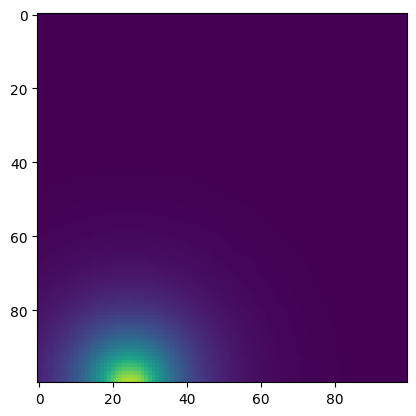

In [2]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states

init_config1 = {'stalk_cells': initial_states.initial_grid1_stalks,
                'attractor_cells': initial_states.initial_grid1_attractors}

grid1 = Grid(width=60, height=60, init_config=init_config1)

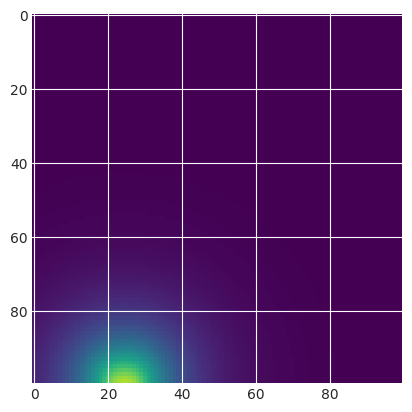

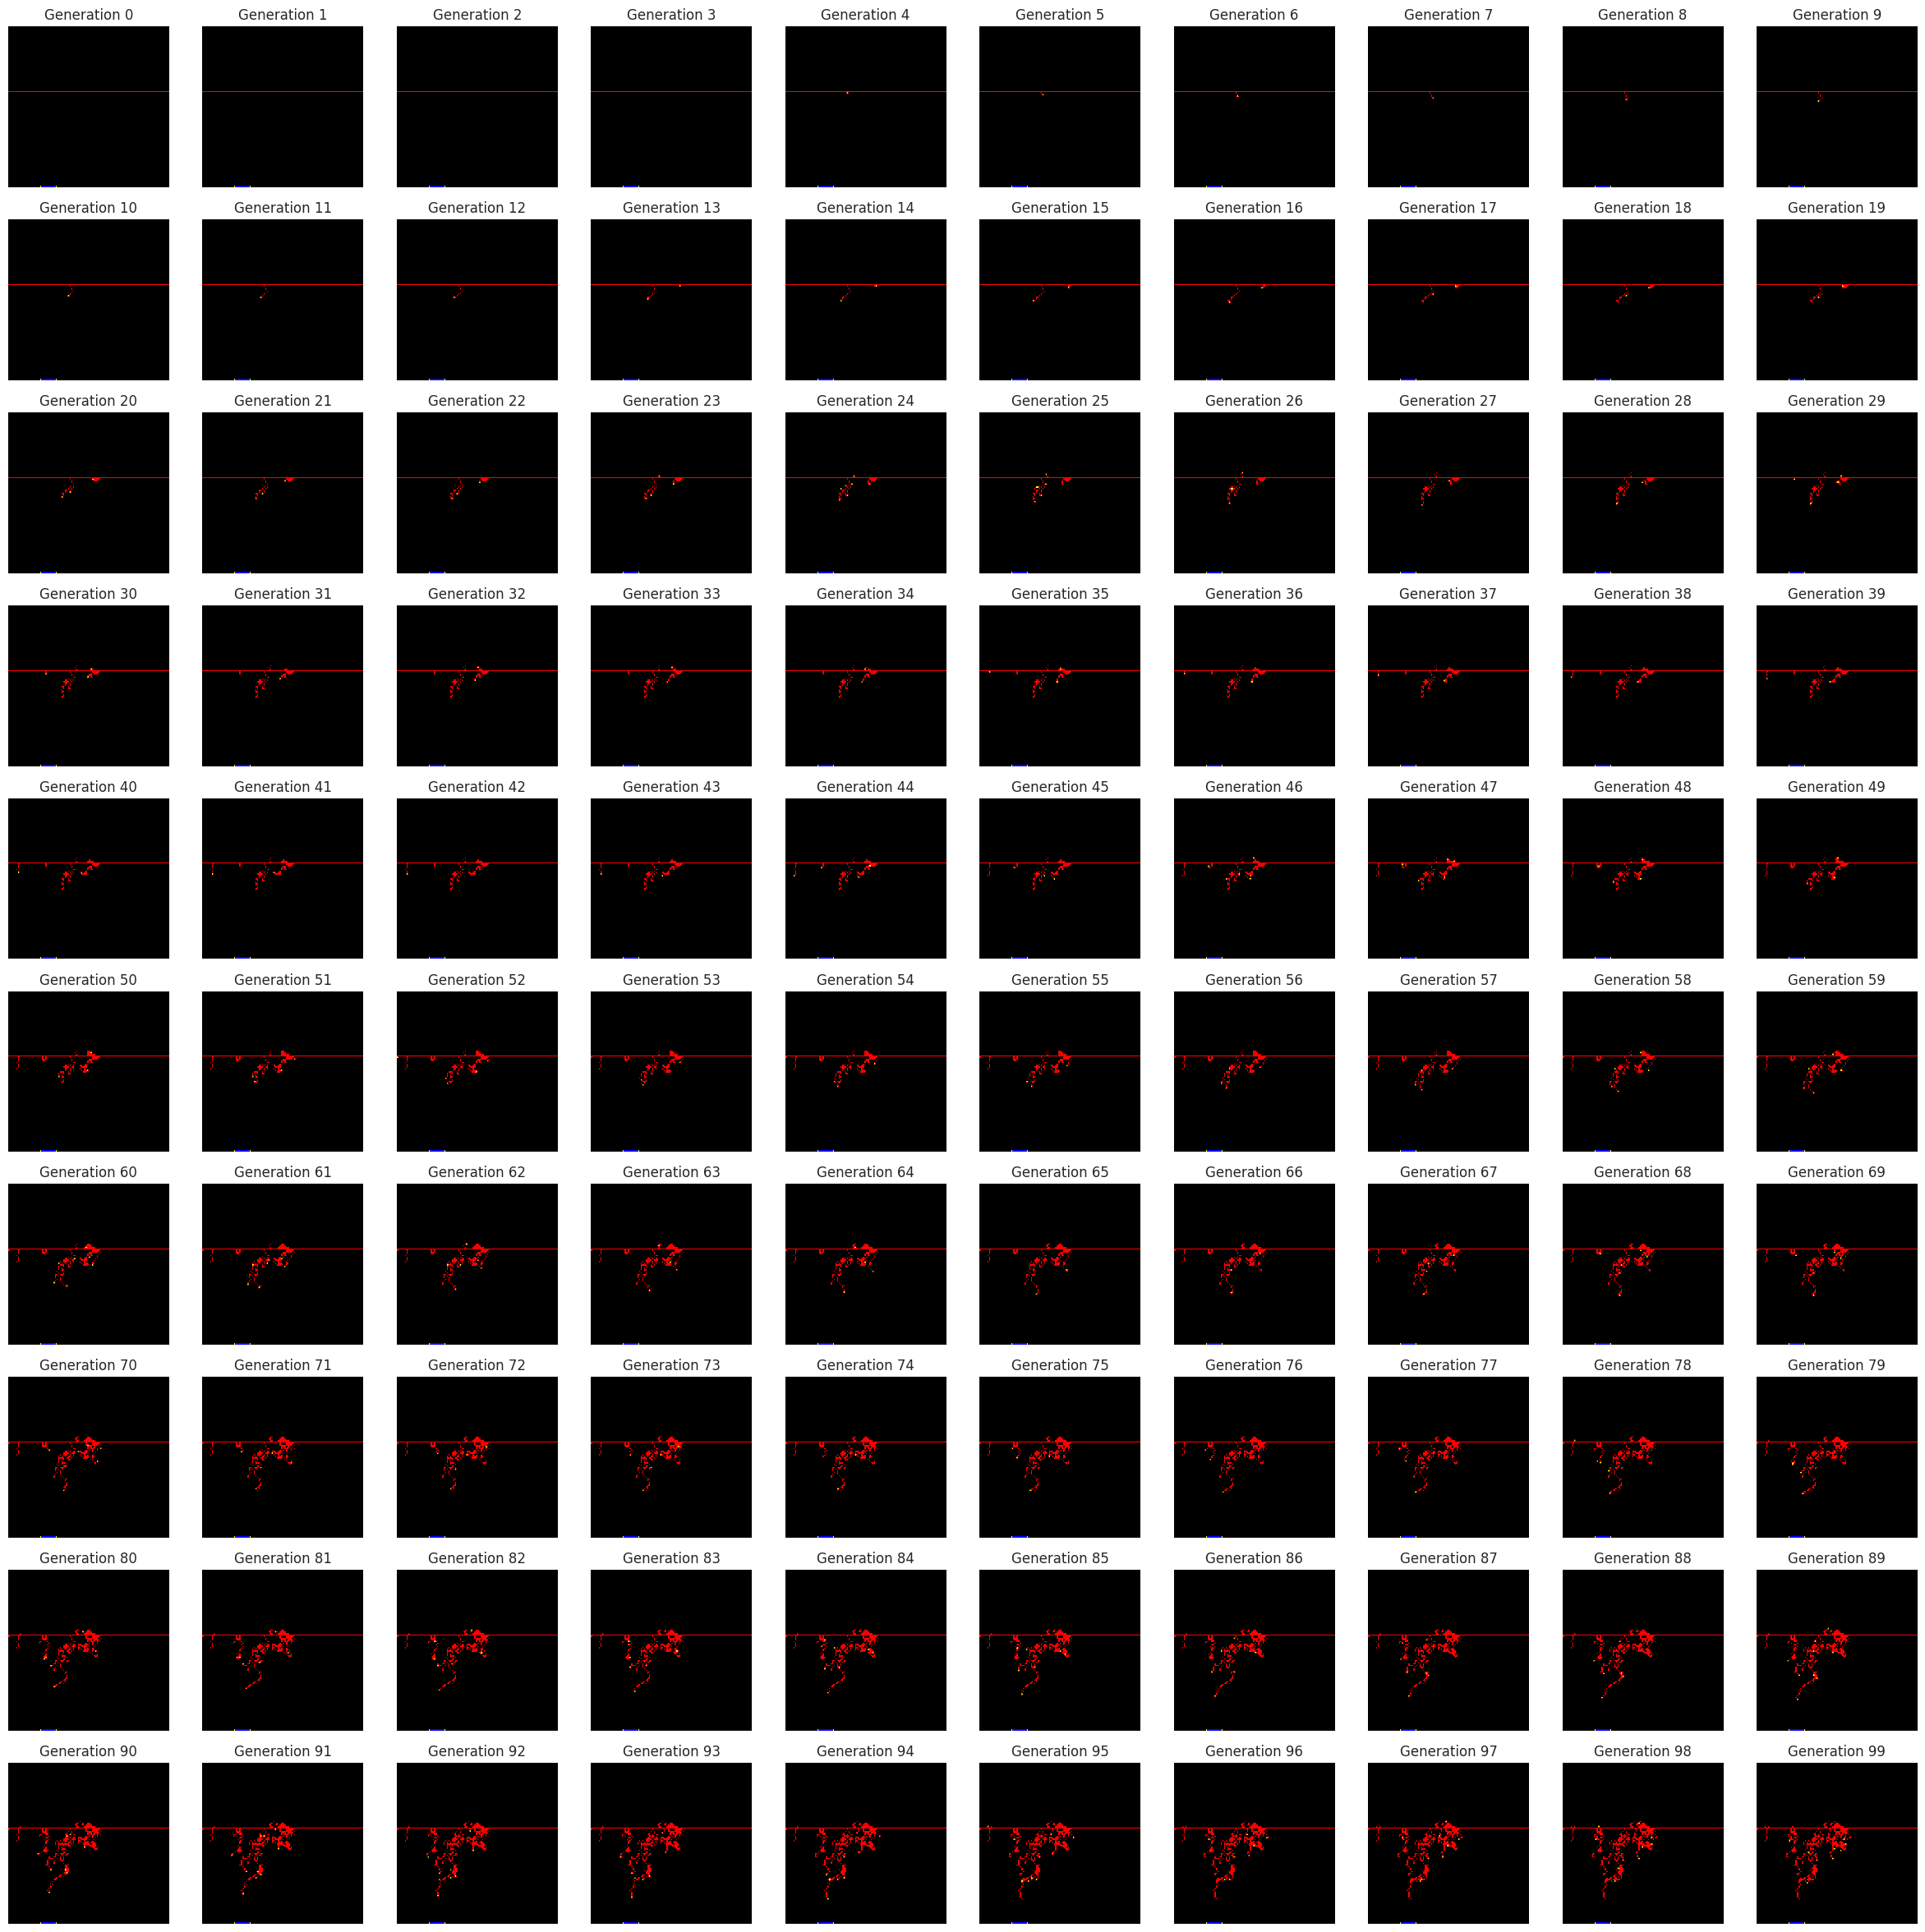

In [14]:
generations1 = 100
engine1 = Engine(init_grid=grid1, generations=generations1)

engine1.run()

engine1.visualize()

In [15]:
engine1.save_results()

In [5]:
stats = engine1.get_stats()
import matplotlib.colors as mcolors
colors = [(0,0,0), (1,0.5,0), (1,0,0), (0,0,1)]
cmap = mcolors.ListedColormap(colors)

stats_cells = stats.num_cell_history
stats_tips = stats.num_tip_history
stats_stalks = stats.num_stalk_history

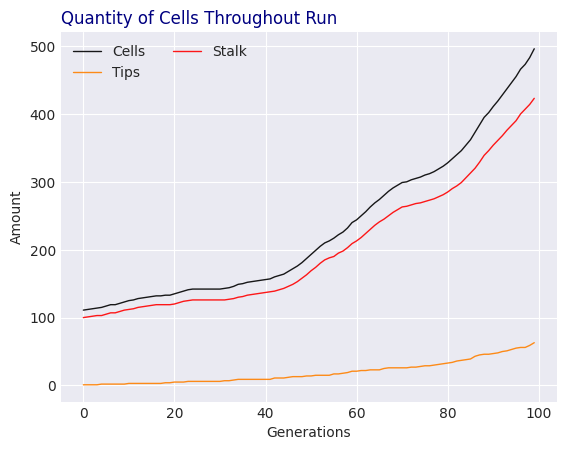

In [7]:

# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Make a data frame
df=pd.DataFrame({'Generations': range(0,generations1), 'Cells': stats_cells, 'Tips': stats_tips, 'Stalk': stats_stalks})
# Change the style of plot
plt.style.use('seaborn-darkgrid')
 
# Create a color palette
palette = cmap
 
# Plot multiple lines
num=0
for column in df.drop('Generations', axis=1):
    plt.plot(df['Generations'], df[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    num+=1

# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Quantity of Cells Throughout Run", loc='left', fontsize=12, fontweight=0, color='navy')
plt.xlabel("Generations")
plt.ylabel("Amount")

# Show the graph
plt.show()

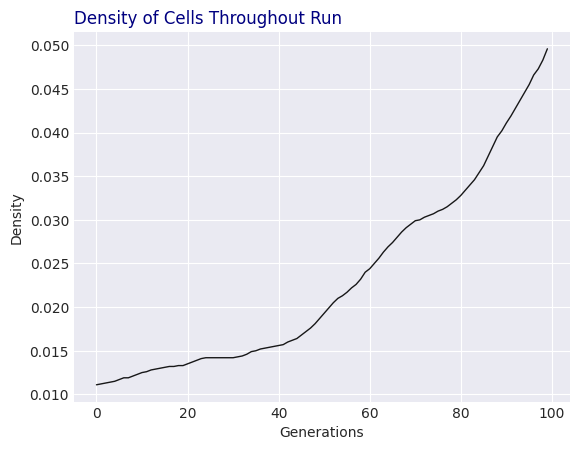

In [9]:
density_history = stats.num_cell_history / grid1.get_area()
plt.plot(range(generations1), density_history, marker='', color=palette(0), linewidth=1, alpha=0.9)

# Add titles
plt.title("Density of Cells Throughout Run", loc='left', fontsize=12, fontweight=0, color='navy')
plt.xlabel("Generations")
plt.ylabel("Density")

# Show the graph
plt.show()